# How do I find and get data?

## For that, I need a Data Butler and a registry...

In [ ]:
import lsst.daf.butler as dafButler
butler = dafButler.Butler('/data/butler/dp02', collections='2.2i/runs/DP0.2')
registry = butler.registry

# First, let's retrieve and plot an image to whet your appetite...

## Import some plotting modules and set parameters...

In [2]:
import matplotlib.pyplot as plt
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')
plt.rcParams['figure.figsize'] = (8.0, 8.0)

## Search for and retrieve some image data...

In [3]:
#query = "tract=4028 AND patch=27 AND band='i'"
id =  {'tract' : 4028, 'patch': 27, 'band':'i'}
coadd_datarefs = list(registry.queryDatasets('deepCoadd_calexp', dataId=id))
coadd = butler.get(coadd_datarefs[0])

## Then plot it...

### This next cell just defines a plotting function...

In [4]:
def plotImage(image, favPx=None):
    fig = plt.figure()
    display = afwDisplay.Display(frame=fig)
    display.scale('asinh', 'zscale')
    display.mtv(image)
    if favPx is not None:
        display.dot('o', favPx[0], favPx[1], size=100, ctype='orange')

### ...which takes an image an plots it: 

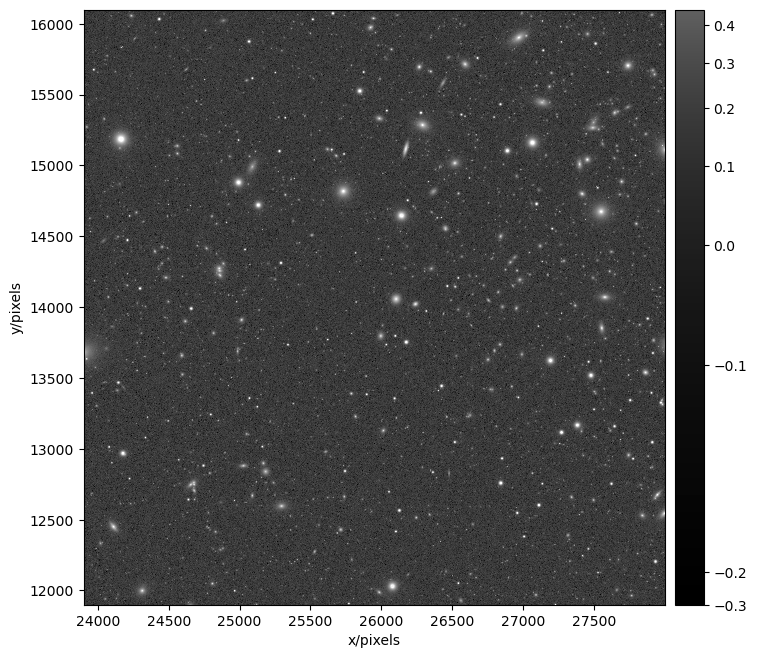

In [5]:
plotImage(coadd.image)
plt.xlabel('x/pixels')
plt.ylabel('y/pixels')
plt.show()

# How did I know...

## ...what _types_ of datasets are available to me?

Use ```registry.queryDatasetTypes()```. You can feed it wildcards, as shown below. If you have some idea of what you are looking for, then you can use partial wildcards, e.g.,  ```registry.queryDatasetTypes(deepCoadd*)```.

In [6]:
datasetTypes = registry.queryDatasetTypes('*')

In [7]:
print('There are {} types of dataset in DP0.2!!\n'.format(len(datasetTypes)))
print('The literal first ten are called:')
for datasetType in datasetTypes[0:9]:
    print(datasetType.name)

There are 940 types of dataset in DP0.2!!

The literal first ten are called:
skyMap
cal_ref_cat_2_2
raw
camera
deepCoadd_det_schema
deepCoadd_calexp
deepCoadd_calexp_background
deepCoadd_det
deepCoadd


With 932 different types of dataset, it can be a bit daunting to know which ones to use. The most likely dataset types a typical use case will use are:
* calibrated exposures (calexp);
* coadded images (deepCoadd_calexp);
* difference images (diffIm);

and their associated tables (though table data is better accessed via the Table Access Platform: TAP).

## Which reminds me...

The `help()` method generally works really well with lsst classes. For example, I can get help documentation to find out all the things I can do with `registry`...

In [8]:
#help(registry)

## ...what datasets exist of a given type?

Once you know the name of the **type** of data you want, you'll probably want to know what data of that type is available. For this, use ```quaryDatasets()```. As shown below, you need to feed it a *dataset type*. Also in the example below, I've asked it to only return datasets of type ```deepCoadd_calexp``` that are in **tracts** numbered between 3085 and 3285 and in the i-**band**.

**Note**: One can query based on equality (`=`), greater than (`>`), less than (`<`), and between X and Y (`in (X..Y)`).

In [9]:
query = "band='i' and tract in (3085..3285)"
deepCoadd_datarefs = registry.queryDatasets('deepCoadd_calexp', where=query)

outstr = 'There are {} deepCoadd_calexps that satisfy the query:"{}".\n'
print(outstr.format(deepCoadd_datarefs.count(exact=False),query))

print('The literal first 10 are:')
for deepCoadd_dataref in list(deepCoadd_datarefs)[0:10]:
    print(deepCoadd_dataref.dataId)

There are 735 deepCoadd_calexps that satisfy the query:"band='i' and tract in (3085..3285)".

The literal first 10 are:
{band: 'i', skymap: 'DC2', tract: 3085, patch: 10}
{band: 'i', skymap: 'DC2', tract: 3085, patch: 24}
{band: 'i', skymap: 'DC2', tract: 3086, patch: 22}
{band: 'i', skymap: 'DC2', tract: 3086, patch: 28}
{band: 'i', skymap: 'DC2', tract: 3085, patch: 22}
{band: 'i', skymap: 'DC2', tract: 3085, patch: 28}
{band: 'i', skymap: 'DC2', tract: 3086, patch: 17}
{band: 'i', skymap: 'DC2', tract: 3085, patch: 6}
{band: 'i', skymap: 'DC2', tract: 3085, patch: 44}
{band: 'i', skymap: 'DC2', tract: 3086, patch: 20}


## ...what I could query on?

It annoys me in tutorials when the tutor just seems to "dream up" terms. How did I know I could query on **band** and **tract**? For that, you can use ```registry.getDatasetType()``` to interrogate a certain **type** of dataset.

In [10]:
coaddType = registry.getDatasetType('deepCoadd_calexp')

In [11]:
print('This is an example of a datasetType:\n {}\n'.format(coaddType))
print('Each datasetType has a name, e.g., {}\n'.format(coaddType.name))
outstr = 'Each datasetType has set of dimensions you can query on, e.g., \n{}\n'
print(outstr.format(coaddType.dimensions))
print('And each datasetType has a class, e.g., {}'.format(coaddType.storageClass))

This is an example of a datasetType:
 DatasetType('deepCoadd_calexp', {band, skymap, tract, patch}, ExposureF)

Each datasetType has a name, e.g., deepCoadd_calexp

Each datasetType has set of dimensions you can query on, e.g., 
{band, skymap, tract, patch}

And each datasetType has a class, e.g., ExposureF


## ...what bands, tracts, and patches are available?

For that, use ```registry.queryDimensionRecords()```. This returns what values, or records, are available for a given dimension. A really inuitive example is "What bands are available?", which is the first query below.

In [12]:
bands = list(registry.queryDimensionRecords('band'))
print('There are {} different bands'.format(len(bands)))
print('The literal standard bands are g, r, i, z, y')

band_names = [band.name for band in butler.registry.queryDimensionRecords('band')]
print('\n But all 19 are:')
for i, band in enumerate(bands):
    end = ',\n' if i%3 == 2 else ', '
    print(band.name, end=end)
print("\nBut, I'm afraid I don't know what ~nd, grid, or spot are!\n")

for dimension in ['tract', 'patch']:
    dimensionRecords = list(butler.registry.queryDimensionRecords(dimension))
    print('\nThere are {} different {}s'.format(len(dimensionRecords),dimension))
    print("The literal first ten {} id's are:".format(dimension))
    try:
        recordList = [dimensionRecord.id for dimensionRecord in dimensionRecords]
    except:
        recordList = [dimensionRecord.name for dimensionRecord in dimensionRecords]
    print(recordList[0:10])


There are 19 different bands
The literal standard bands are g, r, i, z, y

 But all 19 are:
g~nd, z, grid,
grid~nd, z~nd, spot~nd,
unknown, y~nd, white~nd,
r, g, spot,
u, i~nd, i,
u~nd, y, r~nd,
white, 
But, I'm afraid I don't know what ~nd, grid, or spot are!


There are 18938 different tracts
The literal first ten tract id's are:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

There are 927962 different patchs
The literal first ten patch id's are:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# So now I know what bands, tracts, and patches there are, how do I get an image?
## Firstly, what dimensions are required to uniquely identify a coadd?

I could query on loads of different dimensions but, as we've seen, different dataset types require only subsets of dimensions. Handily, if you use ```registry.getDatasetType()``` to interogate a dataset type, it will tell you what dimensions you need to specify to *uniquely* identify a dataset.

In [13]:
coadd_datasetType = registry.getDatasetType('deepCoadd_calexp')
requiredDimensions = coadd_datasetType.dimensions.required.names
print('To uniquely identify a {}, you need to specify:'.format(coadd_datasetType.name))
for requiredDimension in requiredDimensions:
    print(requiredDimension)

To uniquely identify a deepCoadd_calexp, you need to specify:
band
skymap
tract
patch


In [14]:
query = 'tract in (0..19000)'
allUniqueSkyMaps = set(registry.queryDimensionRecords('skymap', where=query))
print(list(allUniqueSkyMaps)[0].dataId)

{skymap: 'DC2'}


## So I now know that I only need to specify a band, a tract, and a patch to uniquely identify a coadd. But arbitrarily choosing a tract and a patch isn't a typical use case...

## ...a more typical use case would be to specify the coordinates of a favourite object...

In [15]:
import lsst.geom as geom
ra, dec = 60.007, -34.875
coords = geom.SpherePoint(ra, dec, geom.degrees)

## ...then using a skyMap to identify which tract and patch covers those coordinates...

In [16]:
skyMap = butler.get('skyMap')

tractInfo = skyMap.findTract(coords)
patchInfo = tractInfo.findPatch(coords)

tractId = tractInfo.getId()
patchId = tractInfo.getSequentialPatchIndex(patchInfo)
print("My favourite object lies in patch {} of tract {}.".format(patchId, tractId))

My favourite object lies in patch 27 of tract 4028.


## ...then using registry.queryDatasets() to get a reference to that data...

In [17]:
query = "tract=4028 AND patch=27 AND band='i'"
coadd_datarefs = list(registry.queryDatasets('deepCoadd_calexp', where=query))
print("\nAnd '{}' does, indeed, return {} result.".format(query, len(coadd_datarefs)))


And 'tract=4028 AND patch=27 AND band='i'' does, indeed, return 1 result.


## and, finally, using butler.get() to actually get the coadd image data:

In [18]:
coadd = butler.get(coadd_datarefs[0])

## And now I can plot that image:
A dataset is usually much, much more than one first expects. For example, a ```deepCoadd_calexp``` isn't just an image; it also contains WCS, PSF, variance (i.e., errors), mask (saturated, cosmic ray etc), information, together with lots of other things, as doing a ```help(coadd)``` will show. In this case, however, we're using the LSST's internal display module to display a ```coadd.image```.

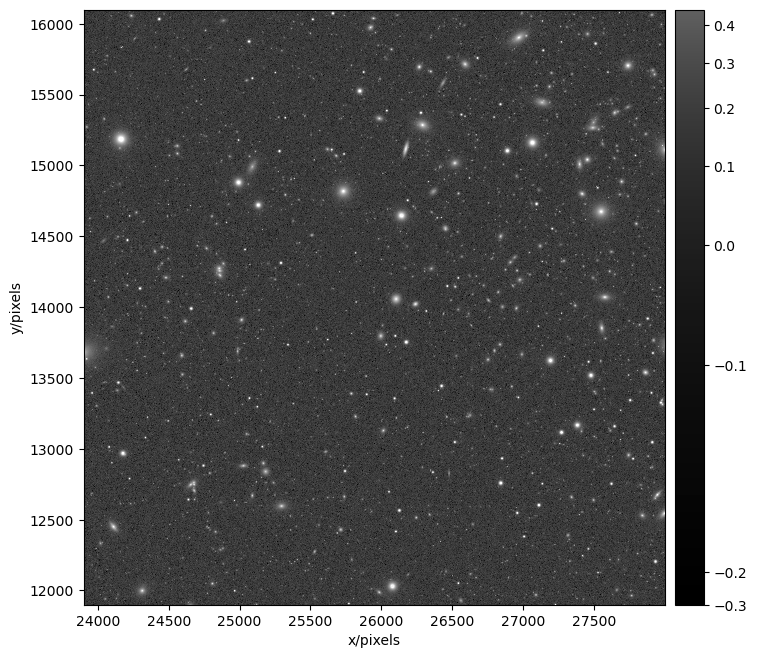

In [19]:
plotImage(coadd.image)
plt.xlabel('x/pixels')
plt.ylabel('y/pixels')
plt.show()

## Can I get (ra,dec) coordinates on that plot?

It'd be nice to get the ticks on that plot to show meaningful coordinates, rather than pixels. To do that, I use one of the many useful pieces of information that comes wrapped up a deepCoadd_calexp dataset - in this case the WCS information, as well as information about the image size and reference pixel.

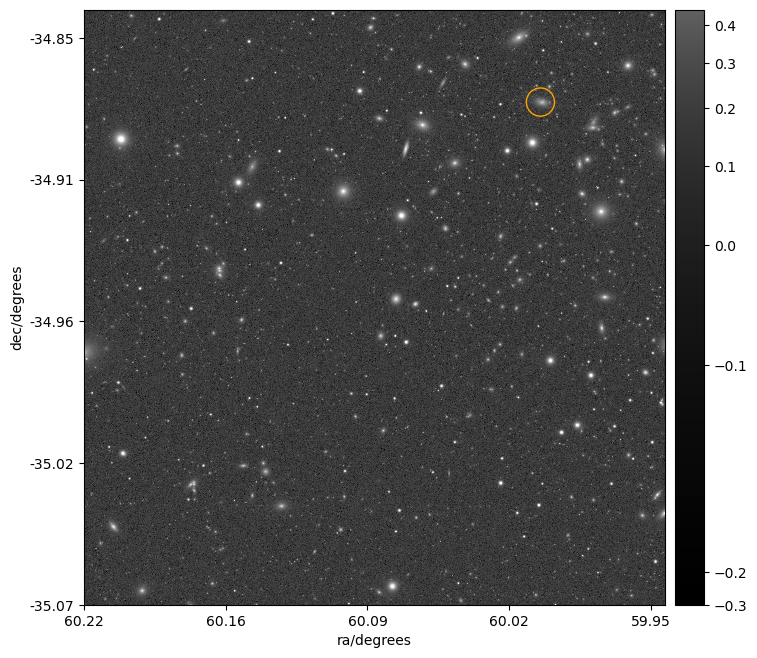

In [20]:
wcs = coadd.getWcs()

x0 = coadd.getX0()
width = coadd.getWidth()

y0 = coadd.getY0()
height = coadd.getHeight()

def tickLabels(xs, ys, imWcs):
    labels = []
    for x in xs:
        for y in ys:
            radec = imWcs.pixelToSky(x, y)
            if len(xs) > 1:
                ra = radec.getRa().asDegrees()
                labels.append('{:.2f}'.format(ra))
            else:
                dec = radec.getDec().asDegrees()
                labels.append('{:.2f}'.format(dec))
    return labels

plotImage(coadd.image, favPx = wcs.skyToPixel(coords))

xtickpos = range(x0, x0+width, 1000)
plt.xticks(xtickpos, tickLabels(xtickpos, [y0], wcs))
plt.xlabel('ra/degrees')

ytickpos = range(y0, y0+height, 1000)
plt.yticks(ytickpos, tickLabels([x0], ytickpos, wcs))
plt.ylabel('dec/degrees')

plt.show()